In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Analysis categories for the wrong answer

### Get 100 answers and the corresponding categories from questions.txt file

In [2]:
# Open the file
with open('../src/main/resources/questions.txt', 'r') as file:
    lines = file.readlines()

# Initialize a list to store the answers
questions = {}
answers = []
categories = []

# Iterate through the lines in steps of 4, starting from the third line (index 2)
for i in range(0, len(lines), 4):
    # Strip newline characters and add to the list of answers
    i_ind = i//4 + 1
    category = lines[i].strip()
    answer = lines[i+2].strip()
    
    categories.append(category)
    answers.append(answer)
    questions[i_ind]=[answer, category]

# Now answers list contains all the answers from the file
categories_index = pd.Index(categories)
categories_unique = categories_index.unique().tolist()
categories_value_counts = categories_index.value_counts()

print(categories_value_counts)

NEWSPAPERS                                                                                                       5
STATE OF THE ART MUSEUM (Alex: We'll give you the museum. You give us the state.)                                5
GOLDEN GLOBE WINNERS                                                                                             5
UCLA CELEBRITY ALUMNI                                                                                            5
NAME THE PARENT COMPANY                                                                                          5
'80s NO.1 HITMAKERS                                                                                              5
HISTORICAL HODGEPODGE                                                                                            4
AFRICAN CITIES                                                                                                   4
OLD YEAR'S RESOLUTIONS                                                          

### "Manual" grouped the original category (modifted fromt the suggestion of ChatGPT)

In [3]:
categories_grouped = {
    "Media": [
        'NEWSPAPERS',
        'BROADWAY LYRICS',
        'GOLDEN GLOBE WINNERS',
        'THAT 20-AUGHTS SHOW',
        "'80s NO.1 HITMAKERS",
        'HE PLAYED A GUY NAMED JACK RYAN IN...',
        'I\'M BURNIN\' FOR YOU',
        '"TIN" MEN',
        'THE RESIDENTS',
        'POETS & POETRY',
    ],
    "History": [
        'HISTORICAL QUOTES',
        'HISTORICAL HODGEPODGE',
        '1920s NEWS FLASH!',
        'CAMBODIAN HISTORY & CULTURE',
        'NOTES FROM THE CAMPAIGN TRAIL',
        'COMPLETE DOM-INATION(Alex: Not "domination.")',
        'OLD YEAR\'S RESOLUTIONS',
        
        'THE QUOTABLE KEATS',
        
    ],
    "Geography": [
        'AFRICAN CITIES',
        'STATE OF THE ART MUSEUM (Alex: We\'ll give you the museum. You give us the state.)',
        'CAPITAL CITY CHURCHES (Alex: We\'ll give you the church. You tell us the capital city in which it is located.)',
        'NAME THE PARENT COMPANY',
        'RANKS & TITLES',
        'CONSERVATION',
    ],   
    "Culture": [
        'SERVICE ORGANIZATIONS',
        'UCLA CELEBRITY ALUMNI',
        'AFRICAN-AMERICAN WOMEN', 
        'POTPOURRI',
        'CEMETERIES',
        'GREEK FOOD & DRINK',
    ]
}

In [4]:
# Print out the dictionary to verify its contents
for category, items in categories_grouped.items():
    print(f"{category}: {items}")

Media: ['NEWSPAPERS', 'BROADWAY LYRICS', 'GOLDEN GLOBE WINNERS', 'THAT 20-AUGHTS SHOW', "'80s NO.1 HITMAKERS", 'HE PLAYED A GUY NAMED JACK RYAN IN...', "I'M BURNIN' FOR YOU", '"TIN" MEN', 'THE RESIDENTS', 'POETS & POETRY']
History: ['HISTORICAL QUOTES', 'HISTORICAL HODGEPODGE', '1920s NEWS FLASH!', 'CAMBODIAN HISTORY & CULTURE', 'NOTES FROM THE CAMPAIGN TRAIL', 'COMPLETE DOM-INATION(Alex: Not "domination.")', "OLD YEAR'S RESOLUTIONS", 'THE QUOTABLE KEATS']
Geography: ['AFRICAN CITIES', "STATE OF THE ART MUSEUM (Alex: We'll give you the museum. You give us the state.)", "CAPITAL CITY CHURCHES (Alex: We'll give you the church. You tell us the capital city in which it is located.)", 'NAME THE PARENT COMPANY', 'RANKS & TITLES', 'CONSERVATION']
Culture: ['SERVICE ORGANIZATIONS', 'UCLA CELEBRITY ALUMNI', 'AFRICAN-AMERICAN WOMEN', 'POTPOURRI', 'CEMETERIES', 'GREEK FOOD & DRINK']


### check if all the category are covered

In [5]:
flattened_values = [item for sublist in categories_grouped.values() for item in sublist]
missing_items = set(categories_unique) - set(flattened_values)

# Output any missing items
if not missing_items:
    print("All items are accounted for in the categories.")
else:
    print("Missing items:", missing_items)

All items are accounted for in the categories.


In [6]:
# Create a dictionary to hold the master categories with their corresponding question indices
master_category_indices = {master: [] for master in categories_grouped.keys()}

# Reverse mapping from category to master category
category_to_master = {}
for master, categories in categories_grouped.items():
    for category in categories:
        category_to_master[category] = master

# Populate the master_category_indices dictionary with question indices
for number, (answer, category) in questions.items():
    master_category = category_to_master.get(category, None)
    if master_category:
        master_category_indices[master_category].append(number)

# Output the result
print(master_category_indices)

{'Media': [1, 3, 4, 7, 14, 17, 28, 30, 34, 35, 38, 40, 44, 45, 51, 53, 60, 61, 68, 69, 70, 72, 75, 77, 79, 82, 84, 85, 89, 92, 95, 100], 'History': [2, 11, 15, 22, 24, 25, 27, 37, 43, 46, 50, 52, 55, 56, 58, 64, 71, 74, 78, 83, 86, 88, 90, 91, 93, 96], 'Geography': [6, 10, 12, 16, 20, 21, 31, 32, 33, 41, 42, 47, 49, 54, 59, 65, 66, 67, 73, 80, 87, 99], 'Culture': [5, 8, 9, 13, 18, 19, 23, 26, 29, 36, 39, 48, 57, 62, 63, 76, 81, 94, 97, 98]}


### Input index of wrong QAs from the Lucene result

In [7]:
wrong_QAs = [3, 5, 6, 11, 12, 15, 16, 19, 21, 23, 26, 30, 32, 33, 41, 42, 43, 46, 48, 52, 65, 66, 
            70, 77, 78, 82, 83, 84, 86, 91, 92, 95, 96, 98]

In [8]:
# Count wrong answers per category
category_wrong_counts = {}
category_all_counts = {}
category_wrong_ratio = {}
for category, indices in master_category_indices.items():
    wrong_count = len(set(indices).intersection(wrong_QAs))
    category_wrong_counts[category] = wrong_count
    category_all_counts[category] = len(indices)
    category_wrong_ratio[category] = wrong_count/len(indices)  

print("Wrong: ", category_wrong_counts)
print("All:   ", category_all_counts)

Wrong:  {'Media': 8, 'History': 10, 'Geography': 10, 'Culture': 6}
All:    {'Media': 32, 'History': 26, 'Geography': 22, 'Culture': 20}


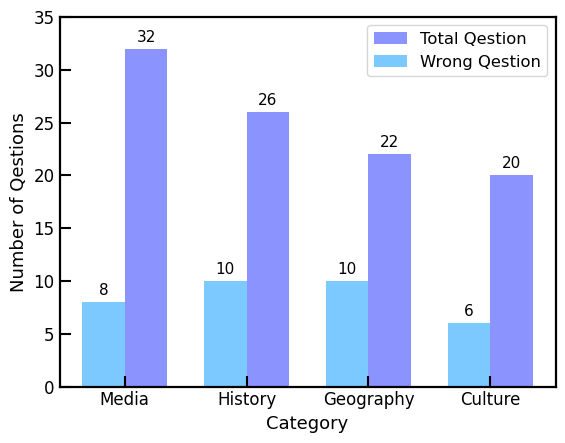

In [9]:
# script modify from: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = list(category_wrong_counts.keys())
wrong = list(category_wrong_counts.values())
total = list(category_all_counts.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x + width/2, total, width, color='#8B93FF', label='Total Qestion')
rects1 = ax.bar(x - width/2, wrong, width, color='#7BC9FF', label='Wrong Qestion')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Category', fontsize=13)
ax.set_ylabel('Number of Qestions', fontsize=13)
ax.set_ylim(0,35)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11.8)
ax.legend(fontsize=11.8)

[x.set_linewidth(1.6) for x in ax.spines.values()]
ax.tick_params(axis="both", which="both", direction="in")
ax.tick_params(axis="both", which='major', length=8, width=1.5)
ax.tick_params(axis="both", which='minor', length=4, width=1.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=11,
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


fig.tight_layout
plt.savefig("category_bar.png", dpi=300, bbox_inches = 'tight')
plt.show()

# 2. Plot Performance vs. top-K

In [10]:
# values output from Lucene codes
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
     20, 30, 40, 50, 60, 70, 80, 90, 
     100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

top1 = [0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 
        0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39]

topk = [39, 44, 49, 52, 54, 54, 54, 55, 57, 59, 64, 67, 68, 68, 71, 72, 74, 75, 75, 80, 82, 86, 87, 87, 87, 87, 87, 87]

MMR = [0.39, 0.415, 0.4316666666666667, 0.4391666666666667, 0.4431666666666667, 0.4431666666666667, 0.4431666666666667, 
       0.4444166666666667, 0.446638888888889, 0.44863888888888903, 0.4519636752136754, 0.45321950271950295, 0.4535136203665618, 
       0.4535136203665618, 0.45407442028334544, 0.4542214791068748, 0.4544829281841134, 0.45459528773467517, 0.45459528773467517, 
       0.45500380664518514, 0.45508925967323405, 0.4551953154397447, 0.45521748838874687, 0.45521748838874687, 0.45521748838874687, 
       0.45521748838874687, 0.45521748838874687, 0.45521748838874687]

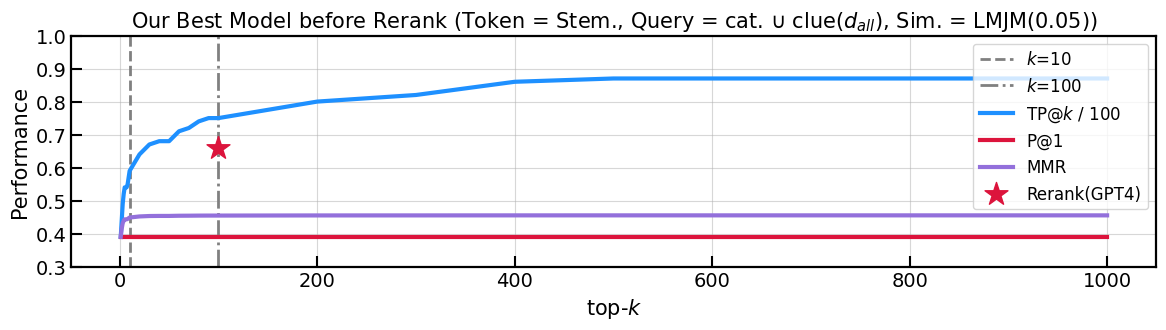

In [11]:
fig, ax = plt.subplots(figsize=(14,3))

y = np.linspace(0.3, 1, 10)
plt.plot(y*0+10, y, '--', lw=2, c="gray", label="$k$=10")
plt.plot(y*0+100, y, '-.', lw=2, c="gray", label="$k$=100")

plt.plot(k, np.array(topk)/100, '-', c="dodgerblue", lw=3, label="TP@$k$ / 100")
plt.plot(k, top1, '-', lw=3, c="crimson", label="P@1")
plt.plot(k, MMR, '-', lw=3, c="mediumpurple", label="MMR")
plt.scatter(100, 0.66, marker='*', c="crimson", s=300, zorder=10, label="Rerank(GPT4)")

plt.title("Our Best Model before Rerank (Token = Stem., Query = cat. $\cup$ clue($d_{all})$, Sim. = LMJM(0.05))", fontsize=15)
plt.xlabel("top-$k$", fontsize=15)
plt.ylabel("Performance", fontsize=15)
# plt.xlim(-200, 1400)
plt.ylim(0.3, 1.0)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
[x.set_linewidth(1.6) for x in ax.spines.values()]
ax.tick_params(axis="both", which="both", direction="in")
ax.tick_params(axis="both", which='major', length=8, width=1.5)
ax.tick_params(axis="both", which='minor', length=4, width=1.3)

plt.grid(alpha =0.5)
plt.legend(loc = "upper right", fontsize=12)
plt.savefig("topk.png", dpi=300, bbox_inches = 'tight')